In [ ]:
import yfinance as yf
import pandas as pd

# Define the company ticker (e.g., TSLA for Tesla)
ticker = "INFY"

# Fetch historical stock data """
stock_data = yf.download(ticker, start="2020-01-01", end="2023-12-31", interval="1d")
company = yf.Ticker(ticker)
income_stmt = company.income_stmt
balance_sheet = company.balance_sheet
cash_flow = company.cash_flow
info = company.info

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [46]:
import pandas as pd
df = pd.read_csv('income_statement.csv')

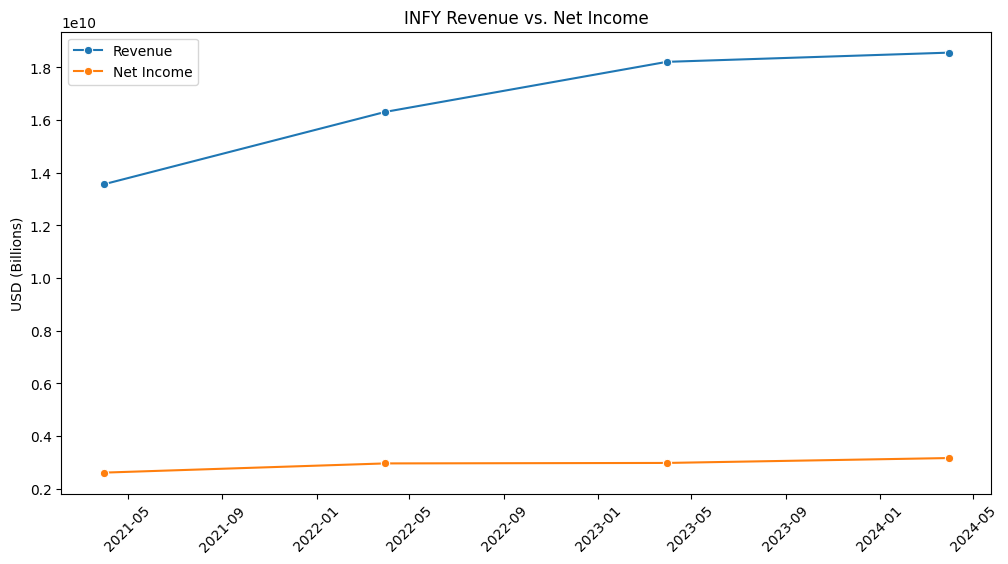

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract annual revenue and net income
revenue = income_stmt.loc['Total Revenue']
net_income = income_stmt.loc['Net Income']

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue, label='Revenue', marker='o')
sns.lineplot(data=net_income, label='Net Income', marker='o')
plt.title(f"{ticker} Revenue vs. Net Income")
plt.ylabel("USD (Billions)")
plt.xticks(rotation=45)
plt.show()

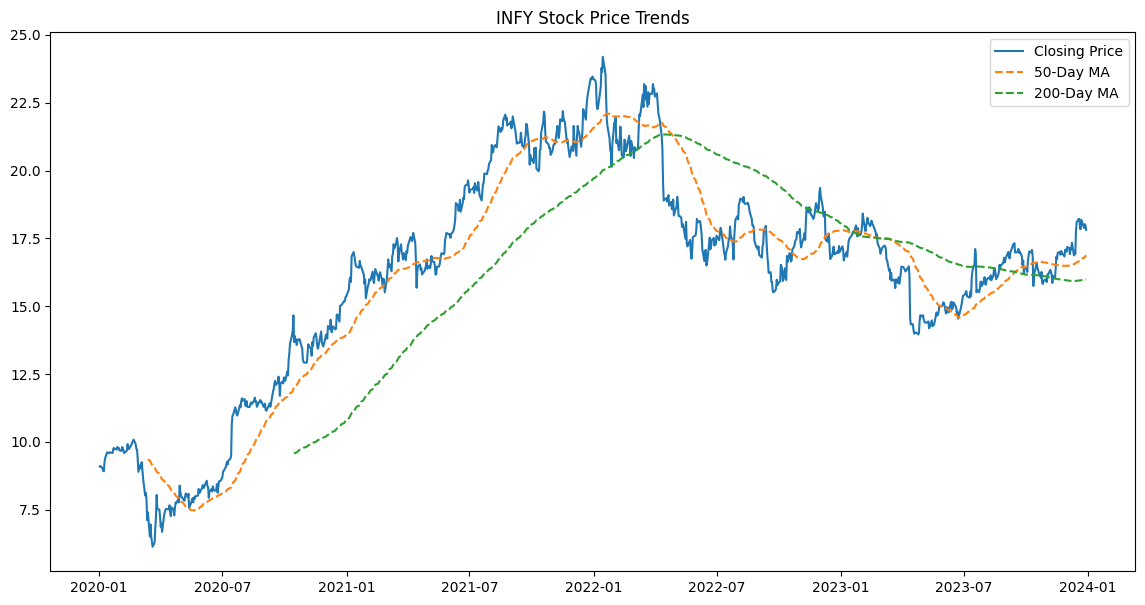

In [50]:
# Calculate 50-day and 200-day moving averages
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA200'] = stock_data['Close'].rolling(window=200).mean()

# Plot stock price trends
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Closing Price')
plt.plot(stock_data['MA50'], label='50-Day MA', linestyle='--')
plt.plot(stock_data['MA200'], label='200-Day MA', linestyle='--')
plt.title(f"{ticker} Stock Price Trends")
plt.legend()
plt.show()

In [51]:
# P/E Ratio (from Yahoo Finance data)
pe_ratio = info.get('trailingPE', 'N/A')

# Debt-to-Equity Ratio
total_debt = balance_sheet.loc['Total Debt'][0]
total_equity = balance_sheet.loc['Total Equity Gross Minority Interest'][0]
debt_to_equity = total_debt / total_equity

# Return on Equity (ROE)
roe = net_income[0] / total_equity

print(f"P/E Ratio: {pe_ratio:.2f}")
print(f"Debt-to-Equity: {debt_to_equity:.2f}")
print(f"ROE: {roe:.2%}")

P/E Ratio: 23.63
Debt-to-Equity: 0.09
ROE: 29.86%


<ipython-input-51-ebb811e53094>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_debt = balance_sheet.loc['Total Debt'][0]
<ipython-input-51-ebb811e53094>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_equity = balance_sheet.loc['Total Equity Gross Minority Interest'][0]
<ipython-input-51-ebb811e53094>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  roe = net_income[0] / total_equity


In [8]:
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Fetch data for a company (e.g., Microsoft)
ticker = "HDB"
company = yf.Ticker(ticker)

# Fetch financial data
income_stmt = company.income_stmt.T
balance_sheet = company.balance_sheet.T
cash_flow = company.cash_flow.T
info = company.info



# Market Cap Treemap (Revenue by Segment - Hypothetical)
# Note: Replace with actual segment data if available
segments = {
    'Product': 0.6,  # Example: 60% of revenue
    'Services': 0.3,
    'Other': 0.1
}
fig_treemap = go.Figure(go.Treemap(
    labels=list(segments.keys()),
    parents=[""]*len(segments),
    values=list(segments.values()),
    marker_colors=['#636EFA', '#EF553B', '#00CC96']
))
fig_treemap.update_layout(title="Revenue by Segment (Treemap)")

# --------------------------
# 3. Liquidity: Advanced
# --------------------------
# Cash vs. Debt Over Time (Dual-Axis Plot)
fig_cash_debt = make_subplots(specs=[[{"secondary_y": True}]])
fig_cash_debt.add_trace(
    go.Bar(x=balance_sheet.index, y=balance_sheet['Cash And Cash Equivalents'], name="Cash"),
    secondary_y=False
)
fig_cash_debt.add_trace(
    go.Scatter(x=balance_sheet.index, y=balance_sheet['Total Debt'], name="Total Debt", line=dict(color='red')),
    secondary_y=True
)
fig_cash_debt.update_layout(title="Cash Reserves vs. Total Debt (Dual-Axis)")

# --------------------------
# 4. Debt: Advanced
# --------------------------
# Debt Composition (Stacked Bar)
debt_short = balance_sheet['Current Debt']
debt_long = balance_sheet['Long Term Debt'] - balance_sheet['Current Debt']

fig_debt_stack = go.Figure()
fig_debt_stack.add_trace(go.Bar(
    x=balance_sheet.index, y=debt_short, name="Short-Term Debt"
))
fig_debt_stack.add_trace(go.Bar(
    x=balance_sheet.index, y=debt_long, name="Long-Term Debt"
))
fig_debt_stack.update_layout(barmode='stack', title="Debt Composition (Stacked Bar)")


# --------------------------
# 6. Stock Performance & Risk
# --------------------------
# Bollinger Bands for Volatility
stock_data = company.history(period="1y")
stock_data['MA20'] = stock_data['Close'].rolling(20).mean()
stock_data['Upper'] = stock_data['MA20'] + 2*stock_data['Close'].rolling(20).std()
stock_data['Lower'] = stock_data['MA20'] - 2*stock_data['Close'].rolling(20).std()

fig_bollinger = go.Figure()
fig_bollinger.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Upper'], name="Upper Band"))
fig_bollinger.add_trace(go.Scatter(x=stock_data.index, y=stock_data['MA20'], name="20-Day MA"))
fig_bollinger.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Lower'], name="Lower Band"))
fig_bollinger.add_trace(go.Candlestick(
    x=stock_data.index,
    open=stock_data['Open'],
    high=stock_data['High'],
    low=stock_data['Low'],
    close=stock_data['Close'],
    name="Price"
))
fig_bollinger.update_layout(title="Bollinger Bands (Volatility Analysis)")

# --------------------------
# Display All Visualizations
# --------------------------
fig_waterfall.show()
fig_margins.show()
fig_treemap.show()
fig_cash_debt.show()
fig_debt_stack.show()
fig_bollinger.show()

In [9]:
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Fetch data for a company (e.g., Microsoft)
ticker = "INFY"
company = yf.Ticker(ticker)

# Fetch financial data
income_stmt = company.income_stmt.T
balance_sheet = company.balance_sheet.T
cash_flow = company.cash_flow.T
info = company.info



# Market Cap Treemap (Revenue by Segment - Hypothetical)
# Note: Replace with actual segment data if available
segments = {
    'Product': 0.6,  # Example: 60% of revenue
    'Services': 0.3,
    'Other': 0.1
}
fig_treemap = go.Figure(go.Treemap(
    labels=list(segments.keys()),
    parents=[""]*len(segments),
    values=list(segments.values()),
    marker_colors=['#636EFA', '#EF553B', '#00CC96']
))
fig_treemap.update_layout(title="Revenue by Segment (Treemap)")

# --------------------------
# 3. Liquidity: Advanced
# --------------------------
# Cash vs. Debt Over Time (Dual-Axis Plot)
fig_cash_debt = make_subplots(specs=[[{"secondary_y": True}]])
fig_cash_debt.add_trace(
    go.Bar(x=balance_sheet.index, y=balance_sheet['Cash And Cash Equivalents'], name="Cash"),
    secondary_y=False
)
fig_cash_debt.add_trace(
    go.Scatter(x=balance_sheet.index, y=balance_sheet['Total Debt'], name="Total Debt", line=dict(color='red')),
    secondary_y=True
)
fig_cash_debt.update_layout(title="Cash Reserves vs. Total Debt (Dual-Axis)")


# --------------------------
# 6. Stock Performance & Risk
# --------------------------
# Bollinger Bands for Volatility
stock_data = company.history(period="1y")
stock_data['MA20'] = stock_data['Close'].rolling(20).mean()
stock_data['Upper'] = stock_data['MA20'] + 2*stock_data['Close'].rolling(20).std()
stock_data['Lower'] = stock_data['MA20'] - 2*stock_data['Close'].rolling(20).std()

fig_bollinger = go.Figure()
fig_bollinger.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Upper'], name="Upper Band"))
fig_bollinger.add_trace(go.Scatter(x=stock_data.index, y=stock_data['MA20'], name="20-Day MA"))
fig_bollinger.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Lower'], name="Lower Band"))
fig_bollinger.add_trace(go.Candlestick(
    x=stock_data.index,
    open=stock_data['Open'],
    high=stock_data['High'],
    low=stock_data['Low'],
    close=stock_data['Close'],
    name="Price"
))
fig_bollinger.update_layout(title="Bollinger Bands (Volatility Analysis)")

# --------------------------
# Display All Visualizations
# --------------------------
fig_waterfall.show()
fig_margins.show()
fig_treemap.show()
fig_cash_debt.show()
fig_debt_stack.show()
fig_bollinger.show()

In [10]:
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Fetch data for a company (e.g., Microsoft)
ticker = "LICI.NS"
company = yf.Ticker(ticker)

# Fetch financial data
income_stmt = company.income_stmt.T
balance_sheet = company.balance_sheet.T
cash_flow = company.cash_flow.T
info = company.info



# Market Cap Treemap (Revenue by Segment - Hypothetical)
# Note: Replace with actual segment data if available
segments = {
    'Product': 0.6,  # Example: 60% of revenue
    'Services': 0.3,
    'Other': 0.1
}
fig_treemap = go.Figure(go.Treemap(
    labels=list(segments.keys()),
    parents=[""]*len(segments),
    values=list(segments.values()),
    marker_colors=['#636EFA', '#EF553B', '#00CC96']
))
fig_treemap.update_layout(title="Revenue by Segment (Treemap)")

# --------------------------
# 3. Liquidity: Advanced
# --------------------------
# Cash vs. Debt Over Time (Dual-Axis Plot)
fig_cash_debt = make_subplots(specs=[[{"secondary_y": True}]])
fig_cash_debt.add_trace(
    go.Bar(x=balance_sheet.index, y=balance_sheet['Cash And Cash Equivalents'], name="Cash"),
    secondary_y=False
)
fig_cash_debt.add_trace(
    go.Scatter(x=balance_sheet.index, y=balance_sheet['Total Debt'], name="Total Debt", line=dict(color='red')),
    secondary_y=True
)
fig_cash_debt.update_layout(title="Cash Reserves vs. Total Debt (Dual-Axis)")


# --------------------------
# 6. Stock Performance & Risk
# --------------------------
# Bollinger Bands for Volatility
stock_data = company.history(period="1y")
stock_data['MA20'] = stock_data['Close'].rolling(20).mean()
stock_data['Upper'] = stock_data['MA20'] + 2*stock_data['Close'].rolling(20).std()
stock_data['Lower'] = stock_data['MA20'] - 2*stock_data['Close'].rolling(20).std()

fig_bollinger = go.Figure()
fig_bollinger.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Upper'], name="Upper Band"))
fig_bollinger.add_trace(go.Scatter(x=stock_data.index, y=stock_data['MA20'], name="20-Day MA"))
fig_bollinger.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Lower'], name="Lower Band"))
fig_bollinger.add_trace(go.Candlestick(
    x=stock_data.index,
    open=stock_data['Open'],
    high=stock_data['High'],
    low=stock_data['Low'],
    close=stock_data['Close'],
    name="Price"
))
fig_bollinger.update_layout(title="Bollinger Bands (Volatility Analysis)")

# --------------------------
# Display All Visualizations
# --------------------------
fig_waterfall.show()
fig_margins.show()
fig_treemap.show()
fig_cash_debt.show()
fig_debt_stack.show()
fig_bollinger.show()